## Anomaly Detection in Transactions
Anomaly detection in transactions means identifying unusual or unexpected patterns within transactions or related activities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("transaction_anomalies_dataset.csv")
df

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings
...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,46,Female,424746,Savings
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,58,Female,908278,Current
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,58,Female,1353498,Current
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,58,Female,359072,Savings


In [4]:
df.shape

(1000, 12)

In [7]:
df.columns

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type'],
      dtype='object')

In [8]:
df.nunique()

Transaction_ID                 1000
Transaction_Amount             1000
Transaction_Volume                4
Average_Transaction_Amount     1000
Frequency_of_Transactions        15
Time_Since_Last_Transaction      29
Day_of_Week                       7
Time_of_Day                      24
Age                              47
Gender                            2
Income                          999
Account_Type                      2
dtype: int64

In [10]:
df.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [12]:
df.dtypes

Transaction_ID                  object
Transaction_Amount             float64
Transaction_Volume               int64
Average_Transaction_Amount     float64
Frequency_of_Transactions        int64
Time_Since_Last_Transaction      int64
Day_of_Week                     object
Time_of_Day                     object
Age                              int64
Gender                          object
Income                           int64
Account_Type                    object
dtype: object

In [15]:
df.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


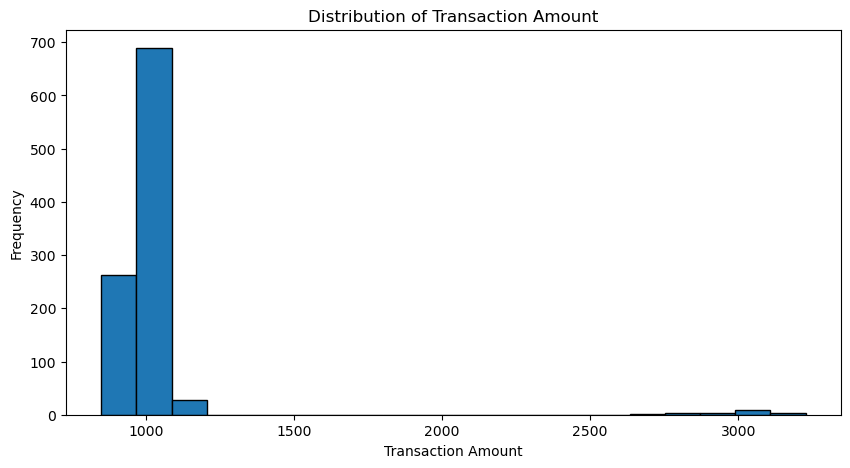

In [53]:
plt.figure(figsize=(10,5))
plt.hist(df['Transaction_Amount'], bins=20, edgecolor='black')

plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

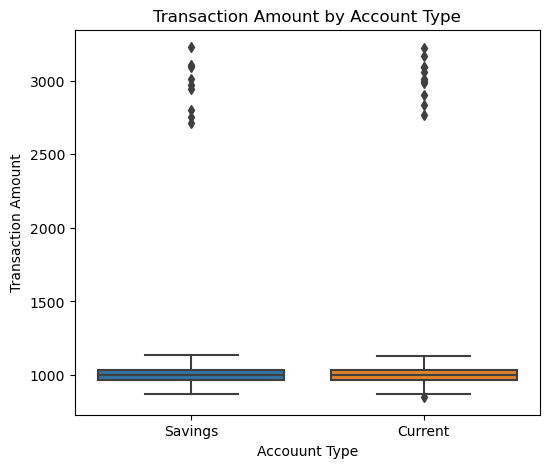

In [52]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=df)

plt.title('Transaction Amount by Account Type')
plt.ylabel('Transaction Amount')
plt.xlabel('Accouunt Type')
plt.show()

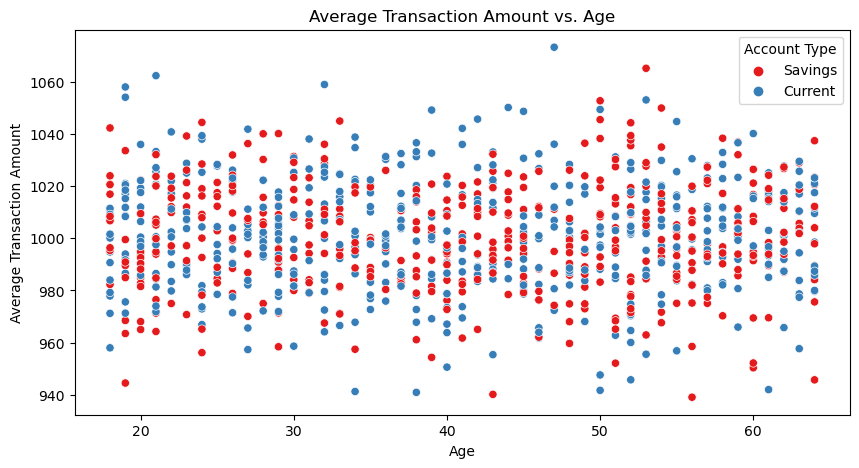

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='Average_Transaction_Amount', data=df, hue='Account_Type', palette='Set1')

plt.title('Average Transaction Amount vs. Age')
plt.ylabel('Average Transaction Amount')
plt.xlabel('Age')
plt.legend(title='Account Type')
plt.show()

There’s no difference in the average transaction amount by age

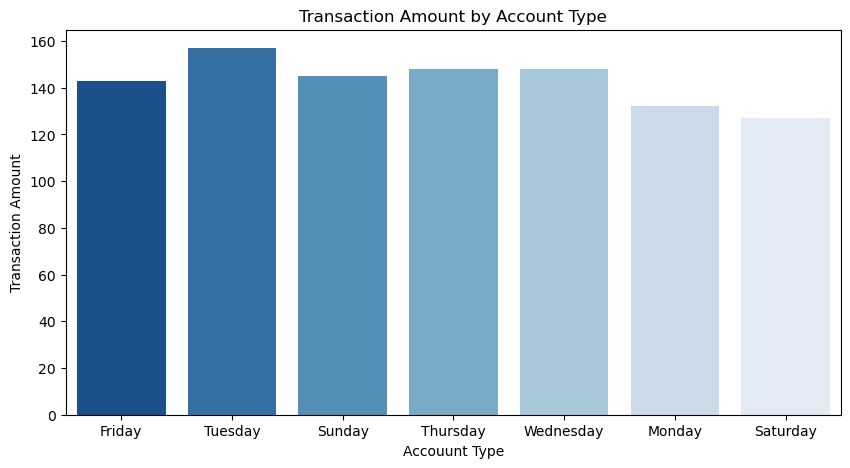

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='Day_of_Week', data=df, palette='Blues_r')

plt.title('Transaction Amount by Account Type')
plt.ylabel('Transaction Amount')
plt.xlabel('Accouunt Type')
plt.show()

In [56]:
correlation_matrix = df[['Transaction_Amount','Transaction_Volume','Average_Transaction_Amount','Frequency_of_Transactions','Time_Since_Last_Transaction','Age','Income']].corr()
correlation_matrix

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
Transaction_Amount,1.000000,0.062350,0.010198,-0.043975,0.026767,0.025019,0.023536
Transaction_Volume,0.062350,1.000000,0.003613,0.025198,0.044042,0.029608,0.066288
Average_Transaction_Amount,0.010198,0.003613,1.000000,0.036980,-0.023472,-0.017699,0.037654
Frequency_of_Transactions,-0.043975,0.025198,0.036980,1.000000,-0.005798,-0.033817,-0.018207
Time_Since_Last_Transaction,0.026767,0.044042,-0.023472,-0.005798,1.000000,0.016974,0.054270
Age,0.025019,0.029608,-0.017699,-0.033817,0.016974,1.000000,-0.006031
Income,0.023536,0.066288,0.037654,-0.018207,0.054270,-0.006031,1.000000


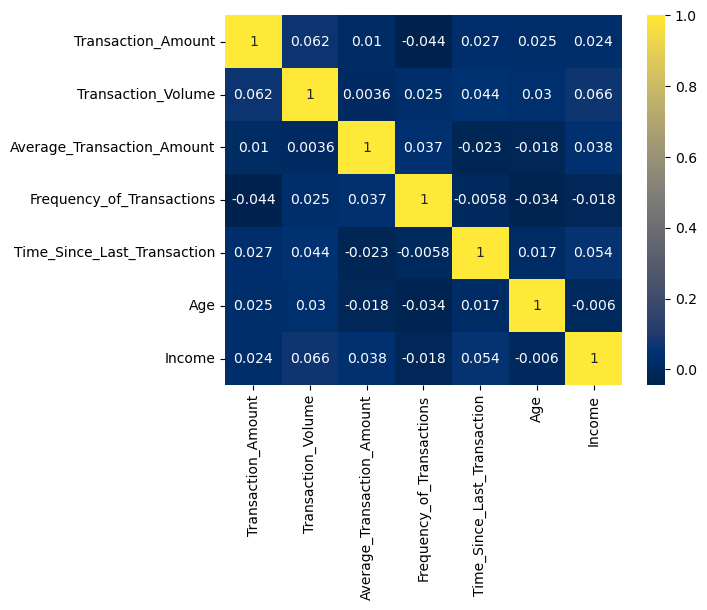

In [59]:
sns.heatmap(correlation_matrix, cmap="cividis", annot=True)
plt.show()

#### Visualizing anomalies in the data

In [62]:
mean = df['Transaction_Amount'].mean()
std = df['Transaction_Amount'].std()
mean, std

(1038.1225107502053, 283.5800547153556)

In [63]:
anomaly_threshold = mean + 2*std #Defining the anomaly threshold

In [66]:
df['Is_Anomaly'] = df['Transaction_Amount']>anomaly_threshold
df.head(10)

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Is_Anomaly
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,False
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,False
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,False
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,False
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,False
5,TX5,969.987307,1,1018.948796,6,20,Thursday,14:00,24,Male,872843,Savings,False
6,TX6,973.317560,2,999.889443,5,4,Tuesday,07:00,21,Male,1105889,Savings,False
7,TX7,931.103035,4,992.937667,10,29,Sunday,17:00,43,Male,502283,Savings,False
8,TX8,1036.923329,4,1003.427366,18,23,Thursday,07:00,38,Female,323247,Savings,False
9,TX9,1013.174302,4,1032.835422,14,25,Thursday,12:00,58,Female,1278732,Current,False


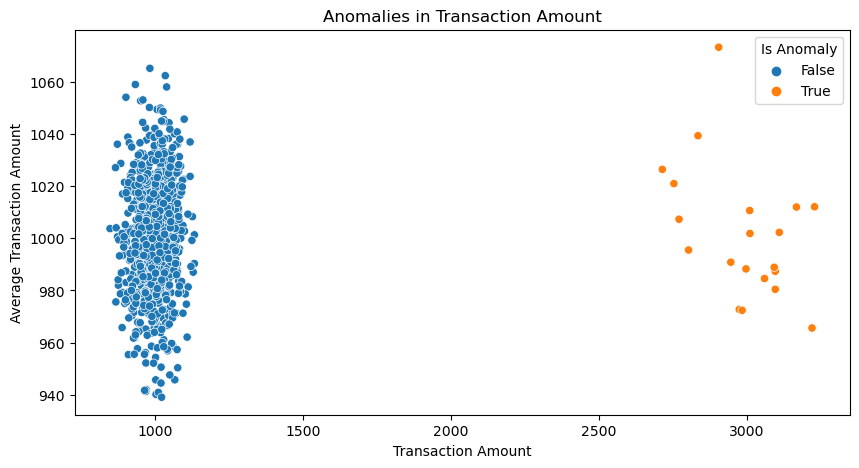

In [75]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Transaction_Amount', y='Average_Transaction_Amount', hue='Is_Anomaly', data=df)

plt.title('Anomalies in Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Average Transaction Amount')
plt.legend(title='Is Anomaly')
plt.show()


#### Calculating the number of anomalies in the data to find the ratio of anomalies in the data

In [76]:
anomalies=df['Is_Anomaly'].sum()

In [81]:
total_instances = df.shape[0]
total_instances

1000

In [79]:
# ratio of anomalies
anomaly_ratio=anomalies/total_instances
anomaly_ratio

0.02

This ratio is taken as contamination parameter later in model building

### Model Creation

In [83]:
relevant_features = ['Transaction_Amount',
                     'Average_Transaction_Amount',
                     'Frequency_of_Transactions']

In [84]:
X = df[relevant_features]
y = df['Is_Anomaly']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.02, random_state=42)

#### Checking the performance of the anomaly detection model

In [91]:
y_pred = model.predict(X_test)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [92]:
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

In [93]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#### Getting user inputs from users to use our trained model to detect anomalies

In [95]:
# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

Enter the value for 'Transaction_Amount': 10000
Enter the value for 'Average_Transaction_Amount': 900
Enter the value for 'Frequency_of_Transactions': 6


In [96]:
# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

Anomaly detected: This transaction is flagged as an anomaly.


#### Summary
- This shows how you can perform anomaly detection in transactions using Machine Learning. 
- Anomaly detection in transactions means identifying unusual or unexpected patterns within transactions or related activities. 
- These patterns, known as anomalies or outliers, deviate significantly from the expected norm and could indicate irregular or fraudulent behaviour.